### Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import re


### Data Loading

In [2]:
df = pd.read_csv("C:\\Users\\Leya\\Downloads\\HarmSpam\\spam.csv",encoding='latin-1')

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

### Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [8]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [10]:
df.head(3)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [11]:
df.describe()

,target,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
# df['target']=df['target'].map({'ham':0,'spam':1})

In [13]:
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [14]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [15]:
### null value
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
## duplicate value
df.duplicated().sum()

403

In [17]:
## drop the duplicate value
df=df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(5169, 2)

### Data Analysis

In [20]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

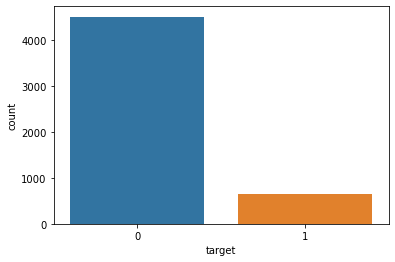

In [21]:
sns.countplot(x='target',data=df)

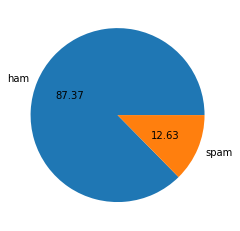

In [22]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [23]:
# here data is imbalanced

In [24]:
# Add 'number of character in text' as new column
df['num_character']=df['text'].apply(len)

C:\Users\Leya\AppData\Local\Temp/ipykernel_14656/2295989158.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_character']=df['text'].apply(len)


In [25]:
df.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
import nltk

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Leya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
# Add 'total number of words in text' as new column
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\Leya\AppData\Local\Temp/ipykernel_14656/1492743641.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [29]:
df.head()

,target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
# Add 'number of sentance in text' as new column
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\Leya\AppData\Local\Temp/ipykernel_14656/3133484828.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [31]:
df.head()

,target,text,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [32]:
# describe our data
df.describe()

,target,num_character,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455407,1.961308
std,0.332253,58.236293,13.322448,1.432583
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [33]:
#show 'ham' data 
df[df['target']==0]

,target,text,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
6,0,Even my brother is not like to speak with me. ...,77,18,2
...,...,...,...,...,...
5565,0,Huh y lei...,12,4,1
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [34]:
# 'ham' data details describe
df[df['target']==0][['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
# 'spam' data details describe
df[df['target']==1][['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [36]:
# histogram

In [37]:
df[df['target']==0]['num_character']

0       111
1        29
3        49
4        61
6        77
       ... 
5565     12
5568     37
5569     57
5570    125
5571     26
Name: num_character, Length: 4516, dtype: int64

<AxesSubplot:xlabel='num_character', ylabel='Count'>

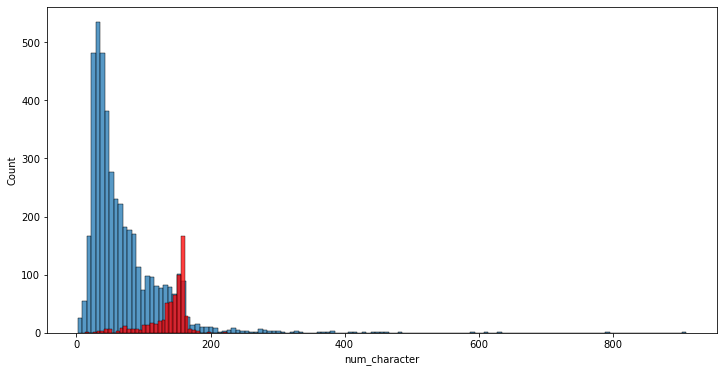

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_character'])
sns.histplot(df[df['target']==1]['num_character'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

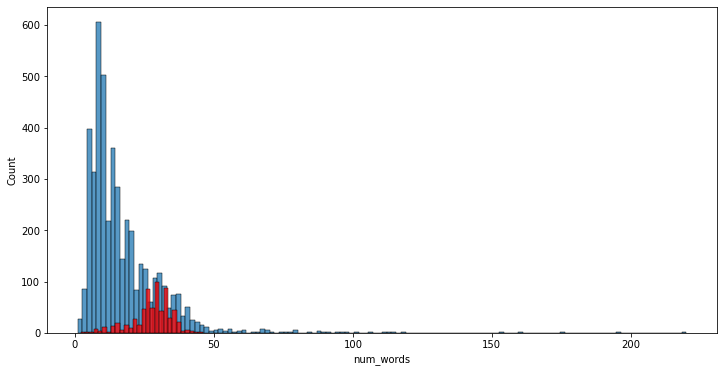

In [39]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

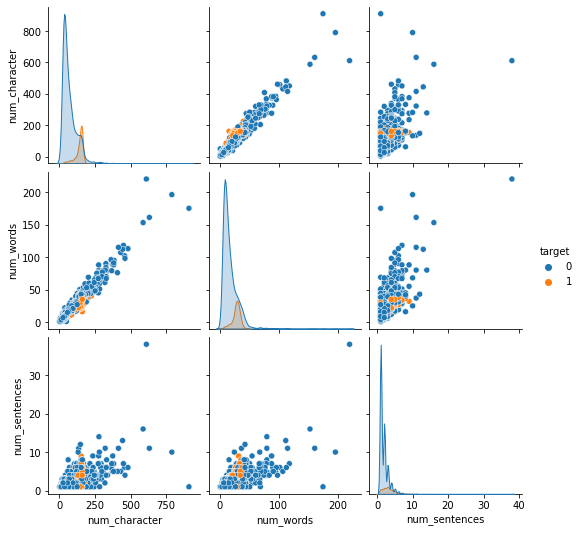

In [40]:
sns.pairplot(df,hue='target')

In [41]:
#data has few outlayer

<AxesSubplot:>

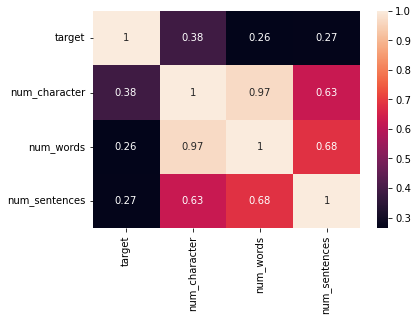

In [42]:
sns.heatmap(df.corr(),annot=True)

In [43]:
# we have two type of Correltion - positive and negative correlation
# positive = one variable increase,other variable also increase
# negative = one variable decrease,other variable also increase

### Preprocessing

In [44]:
#lower case,Tokenization,remove special character,,remove stopwords and puntucation,stemming

In [45]:
port_stem = PorterStemmer()

In [46]:
def transform_text(text):
    transform_text=re.sub('[^a-zA-Z]',' ',text)
    transform_text=transform_text.lower()
    transform_text=nltk.word_tokenize(transform_text)  # split
    transform_text=[port_stem.stem(word) for word in transform_text if not word in stopwords.words('english')]
    transform_text=' '.join(transform_text)
    return transform_text

In [47]:
df['text']=df['text'].apply(transform_text)

C:\Users\Leya\AppData\Local\Temp/ipykernel_14656/3241491471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text']=df['text'].apply(transform_text)


In [48]:
df['text']

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri wkli comp win fa cup final tkt st m...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    nd time tri contact u u pound prize claim easi...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [49]:
df

,target,text,num_character,num_words,num_sentences
0,0,go jurong point crazi avail bugi n great world...,111,24,2
1,0,ok lar joke wif u oni,29,8,2
2,1,free entri wkli comp win fa cup final tkt st m...,155,37,2
3,0,u dun say earli hor u c alreadi say,49,13,1
4,0,nah think goe usf live around though,61,15,1
...,...,...,...,...,...
5567,1,nd time tri contact u u pound prize claim easi...,161,35,4
5568,0,b go esplanad fr home,37,9,1
5569,0,piti mood suggest,57,15,2
5570,0,guy bitch act like interest buy someth els nex...,125,27,1


In [50]:
from wordcloud import WordCloud

In [51]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

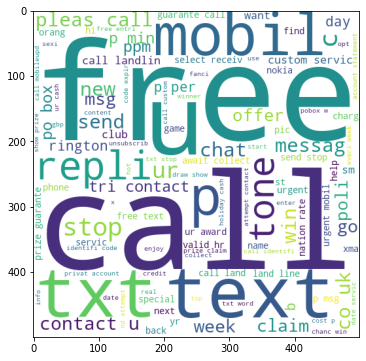

In [52]:
spam_wc=wc.generate(df[df['target']==1]['text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

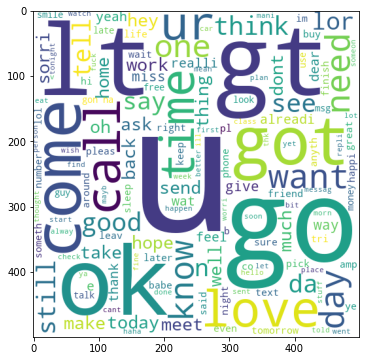

In [53]:
ham_wc=wc.generate(df[df['target']==0]['text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [54]:
spam_corpus =[]
for msg in df[df['target']==1]['text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [55]:
len(spam_corpus)

10078

In [56]:
from collections import Counter
Counter(spam_corpus)
pd.DataFrame(Counter(spam_corpus).most_common(10))

,0,1
0,call,346
1,free,197
2,p,158
3,u,157
4,txt,152
5,text,129
6,mobil,121
7,ur,119
8,stop,114
9,repli,104


In [57]:
ham_corpus =[]
for msg in df[df['target']==0]['text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [58]:
len(ham_corpus)

35481

In [59]:
pd.DataFrame(Counter(ham_corpus).most_common(10))

,0,1
0,u,922
1,go,409
2,get,358
3,gt,288
4,lt,287
5,come,277
6,ok,255
7,call,240
8,got,239
9,like,236


### Build Model 

In [60]:
# X=df['text'].values
# Y=df['target'].values

In [61]:
# print(X.shape)
# print(Y.shape)
# print(Y)
# print(X[0])
# print(Y[0])

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [63]:
X=vectorizer.fit_transform(df['text']).toarray()

In [64]:
X.shape

(5169, 6217)

In [65]:
Y=df['target'].values

In [66]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)
print(x_train.shape , y_train.shape)

(4135, 6217) (4135,)


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

In [68]:
models = [LogisticRegression(),
         DecisionTreeClassifier(),
         RandomForestClassifier(),
         KNeighborsClassifier(),
         MultinomialNB()]
model_title = ['logisticRegression','DecisionTreeClassifier','RandomForestClassifier','KNeighborsClassifier','MultinomialNB']

In [69]:
train_score =[]
test_score=[]
prediction = []
for i,model in enumerate(models):
    model.fit(x_train,y_train)
    print("Model :",model_title[i])
    prediction = model.predict(x_test)
    train_score.append(model.score(x_train,y_train))
    test_score.append(model.score(x_test,y_test))
    print("train score",model.score(x_train,y_train))
    print("test score",model.score(x_test,y_test))
    print(f1_score(y_test,prediction))    
    print('\n')


Model : logisticRegression
train score 0.9668681983071342
test score 0.9613152804642167
0.823008849557522


Model : DecisionTreeClassifier
train score 1.0
test score 0.960348162475822
0.8441064638783269


Model : RandomForestClassifier
train score 1.0
test score 0.9845261121856866
0.9349593495934959


Model : KNeighborsClassifier
train score 0.9252720677146312
test score 0.9119922630560928
0.4678362573099415


Model : MultinomialNB
train score 0.9719467956469166
test score 0.9709864603481625
0.8706896551724138




In [70]:
# Its is clear that 'MultinomialNB' is best model when compare to other

In [71]:
multinomial_model = MultinomialNB()
multinomial_model.fit(x_train,y_train)
test_prediction = multinomial_model.predict(x_test)

In [72]:
print("train score ",multinomial_model.score(x_train,y_train))
print("test score :",multinomial_model.score(x_test,y_test))

train score  0.9719467956469166
test score : 0.9709864603481625


In [73]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,f1_score,precision_score,recall_score

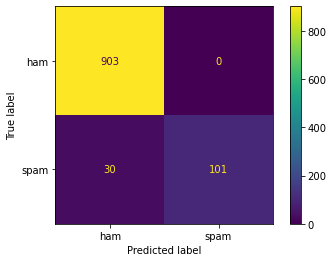

In [74]:
ConfusionMatrixDisplay(confusion_matrix(y_test,test_prediction),display_labels=['ham','spam']).plot()

In [75]:
print("precision :",precision_score(y_test,test_prediction))

precision : 1.0


In [76]:
print("recall :",recall_score(y_test,test_prediction))

recall : 0.7709923664122137


In [77]:
print("f1 score :",f1_score(y_test,test_prediction))

f1 score : 0.8706896551724138


In [78]:
# import pickle
# pickle.dump(vectorizer,open('vectorizer.pkl','wb'))
# pickle.dump(multinomial_model,open('model.pkl','wb'))

In [79]:
# from joblib import dump, load
# >>> dump(clf, 'filename.joblib') 


In [80]:
import joblib

In [83]:
joblib.dump(vectorizer,open('vectorizer.joblib','wb'))

In [84]:
joblib.dump(multinomial_model,open('model.joblib','wb'))